In [68]:
import pandas as pd
pumpkins = pd.read_csv(r'D:\ernie\self-study\Data Science\ML-For-Beginners\2-Regression\data\US-pumpkins.csv')
pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [69]:
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [70]:
pumpkins.columns
pumpkins.head(1)

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN


## 1. Adding "Month" column to df (derive from date column)
## 2. Calculating average price

In [71]:
new_pumpkins = pumpkins.copy()

In [72]:
# pd.to_datetime(pumpkins.Date[0]).month
new_pumpkins["Month"] = [pd.to_datetime(a).month for a in new_pumpkins.Date]
#pumpkins.Month


In [73]:
price = (new_pumpkins['Low Price'] + new_pumpkins['High Price'])/2
new_pumpkins["Price"] = price

In [74]:
new_columns = ["Package","Month","Low Price","High Price","Price"]
new_pumpkins = new_pumpkins.drop([c for c in new_pumpkins.columns if c not in new_columns], axis = 1)

In [75]:
new_pumpkins.head()

,Package,Low Price,High Price,Month,Price
0,24 inch bins,270.0,280.0,4,275.0
1,24 inch bins,270.0,280.0,5,275.0
2,24 inch bins,160.0,160.0,9,160.0
3,24 inch bins,160.0,160.0,9,160.0
4,24 inch bins,90.0,100.0,11,95.0


## Tidy package unit of scale

In [76]:
# Finding the different units
new_pumpkins.Package.unique()
#new_pumpkins.shape

array(['24 inch bins', '36 inch bins', '50 lb sacks',
       '1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bins', '35 lb cartons',
       'each', '20 lb cartons', '50 lb cartons', '40 lb cartons',
       'bushel baskets', '22 lb cartons'], dtype=object)

In [77]:
# leaving only bushel cartons units
new_pumpkins = new_pumpkins[new_pumpkins.Package.str.contains('bushel', case = True, regex = True)]
new_pumpkins.shape

(415, 5)

In [78]:
new_pumpkins.Package.unique()

array(['1 1/9 bushel cartons', '1/2 bushel cartons',
       '1 1/9 bushel crates', 'bushel cartons', 'bushel baskets'],
      dtype=object)

In [81]:
price = new_pumpkins.Price
new_pumpkins.loc[new_pumpkins.Package.str.contains('1 1/9'),"Price"] = price/(1 + 1/9)
new_pumpkins.loc[new_pumpkins.Package.str.contains('1/2'),"Price"] = price/(1/2)

In [83]:
new_pumpkins.groupby("Package").mean() # we can observe that the price for 1/2 is particularly high

,Low Price,High Price,Month,Price
Package,,,,
1 1/9 bushel cartons,17.017094,17.632479,10.008547,15.592308
1 1/9 bushel crates,16.058824,16.705882,10.294118,14.744118
1/2 bushel cartons,16.701923,17.751068,9.735043,34.452991
bushel baskets,43.800000,49.100000,9.700000,46.450000
bushel cartons,23.324324,24.027027,9.783784,23.675676


## Vizualization

In [84]:
import matplotlib.pyplot as plt

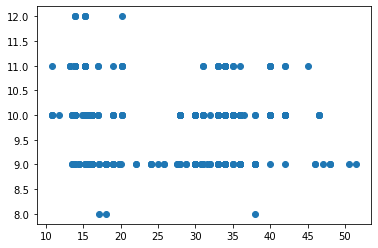

In [85]:
price = new_pumpkins.Price
month = new_pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

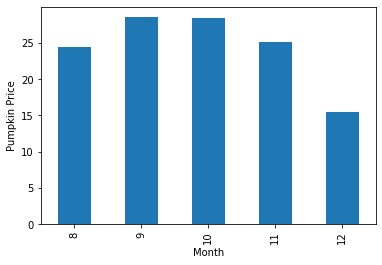

In [86]:
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

## Self Exploration- Visualization

<AxesSubplot:xlabel='Package'>

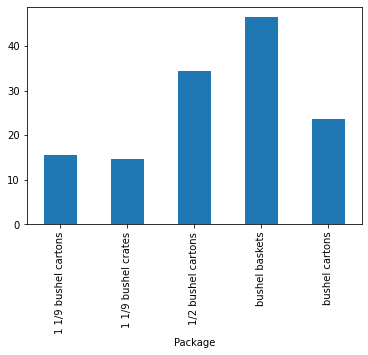

In [92]:
new_pumpkins.groupby(['Package'])['Price'].mean().plot(kind='bar')


<AxesSubplot:>

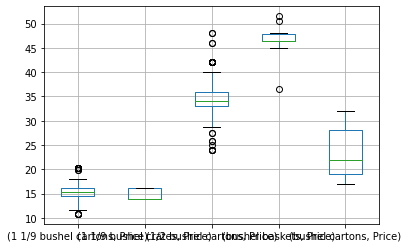

In [109]:
new_pumpkins[["Package","Price"]].groupby(["Package"]).boxplot(subplots=False)
